In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

data = pd.read_csv("./data.csv")
data.head()

,Model,Learning Time (s),Evaluation Time (s),Mean Reward,Std Reward
0,DQN,3615.5,38.2,8.293996,4.938061
1,PPO,3639.5,139.0,28.649704,0.870930
2,A2C,3657.2,35.0,8.405016,3.775746


## Comparison of training times

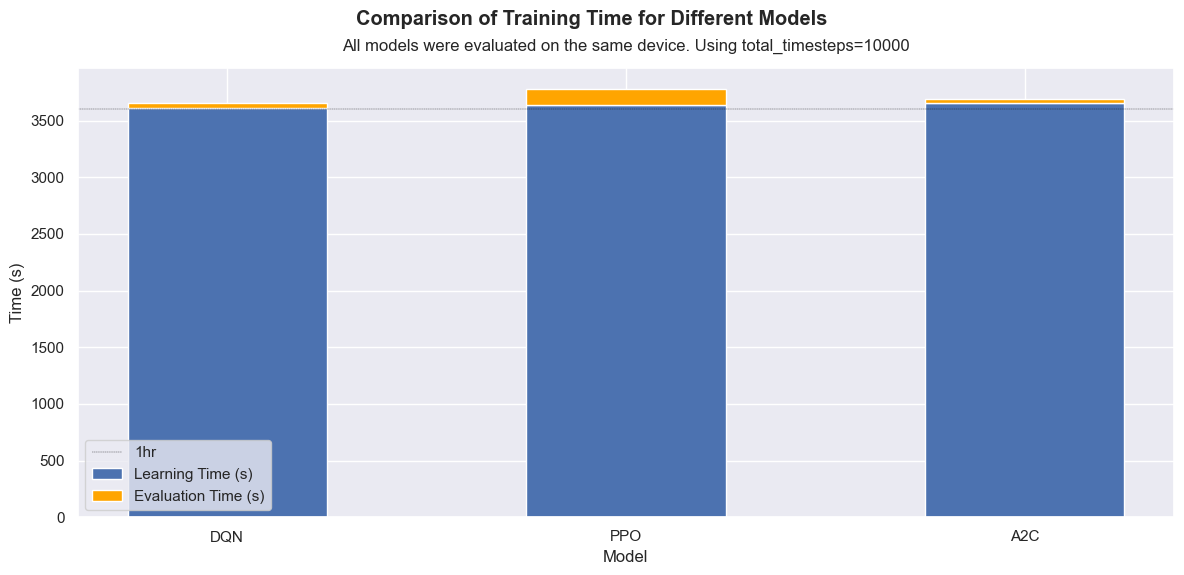

In [7]:
training_times_DF = data[["Model", "Learning Time (s)", "Evaluation Time (s)"]].copy()
training_times_DF["Total Time (s)"] = training_times_DF["Learning Time (s)"] + training_times_DF["Evaluation Time (s)"]


# Plot
plt.figure(figsize=(12, 6))
plt.bar(training_times_DF["Model"], training_times_DF["Learning Time (s)"], color="b", label="Learning Time (s)", width=0.5)
plt.bar(training_times_DF["Model"], training_times_DF["Evaluation Time (s)"], color="orange", bottom=training_times_DF["Learning Time (s)"], label="Evaluation Time (s)", width=0.5)

plt.suptitle('Comparison of Training Time for Different Models', fontweight="bold", y=0.955)
plt.title('All models were evaluated on the same device. Using total_timesteps=10000', y=1.02)
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.axhline(3600, linestyle="--", color="black", linewidth="0.25", label="1hr")
plt.tight_layout()
plt.legend()
plt.show()

## Comparison of Evaluations

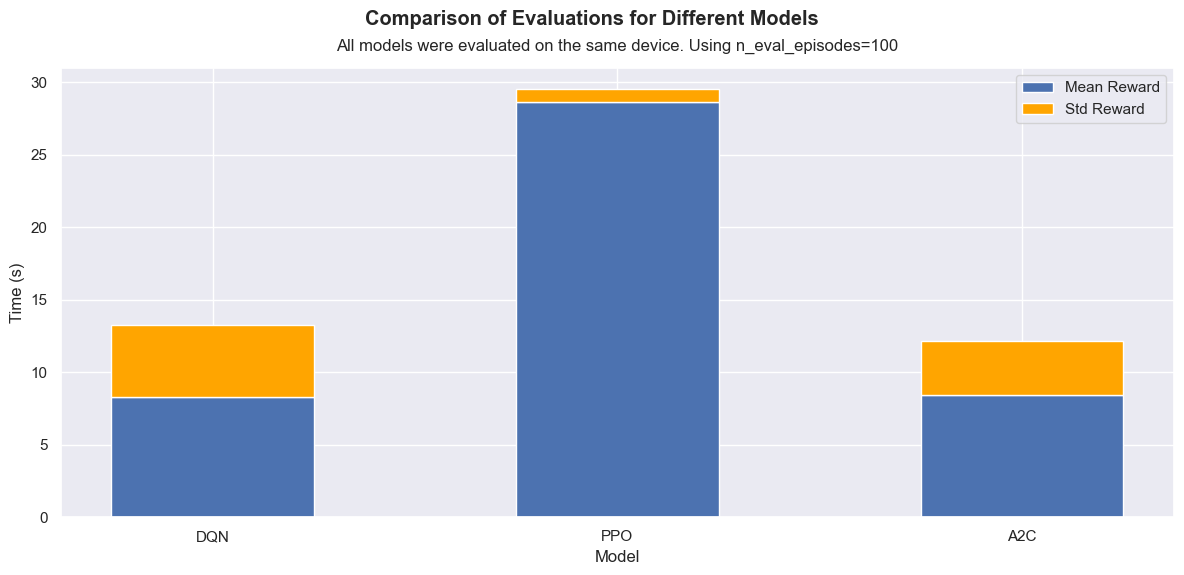

In [6]:
evaluation_DF = data[["Model", "Mean Reward", "Std Reward"]].copy()
evaluation_DF["SUM"] = evaluation_DF["Mean Reward"] + evaluation_DF["Std Reward"]


# Plot
plt.figure(figsize=(12, 6))
plt.bar(evaluation_DF["Model"], evaluation_DF["Mean Reward"], color="b", label="Mean Reward", width=0.5)
plt.bar(evaluation_DF["Model"], evaluation_DF["Std Reward"], color="orange", bottom=evaluation_DF["Mean Reward"], label="Std Reward", width=0.5)

plt.suptitle('Comparison of Evaluations for Different Models', fontweight="bold", y=0.955)
plt.title('All models were evaluated on the same device. Using n_eval_episodes=100', y=1.02)
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.legend()
plt.show()

## ~~Correlation Between Numerical Values of Model Evaluation~~

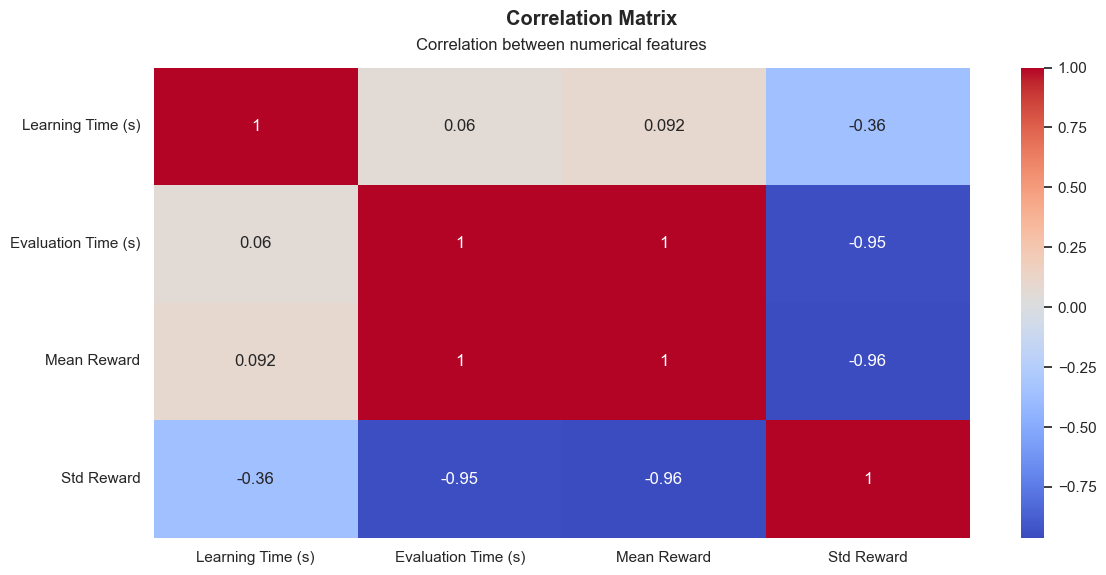

In [14]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, cmap="coolwarm")
plt.suptitle('Correlation Matrix', fontweight="bold", y=0.955)
plt.title('Correlation between numerical features', y=1.02)
plt.tight_layout()
plt.show()


## ~~Relation Between Training Time and Mean Reward~~

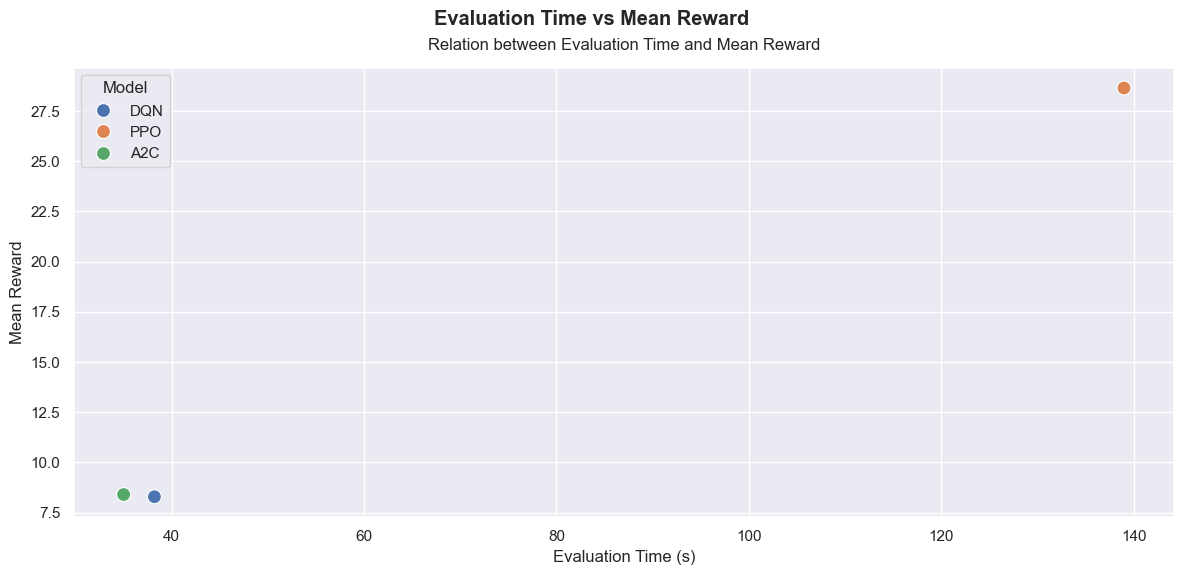

In [37]:
relation_DF = data[["Model", "Evaluation Time (s)", "Mean Reward"]].copy()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=relation_DF, x="Evaluation Time (s)", y="Mean Reward", hue="Model", s=100)
plt.suptitle('Evaluation Time vs Mean Reward', fontweight="bold", y=0.955)
plt.title('Relation between Evaluation Time and Mean Reward', y=1.02)
plt.xlabel('Evaluation Time (s)')
plt.ylabel('Mean Reward')
plt.tight_layout()
plt.show()

## ~~Pairplot~~

<Figure size 1200x600 with 0 Axes>

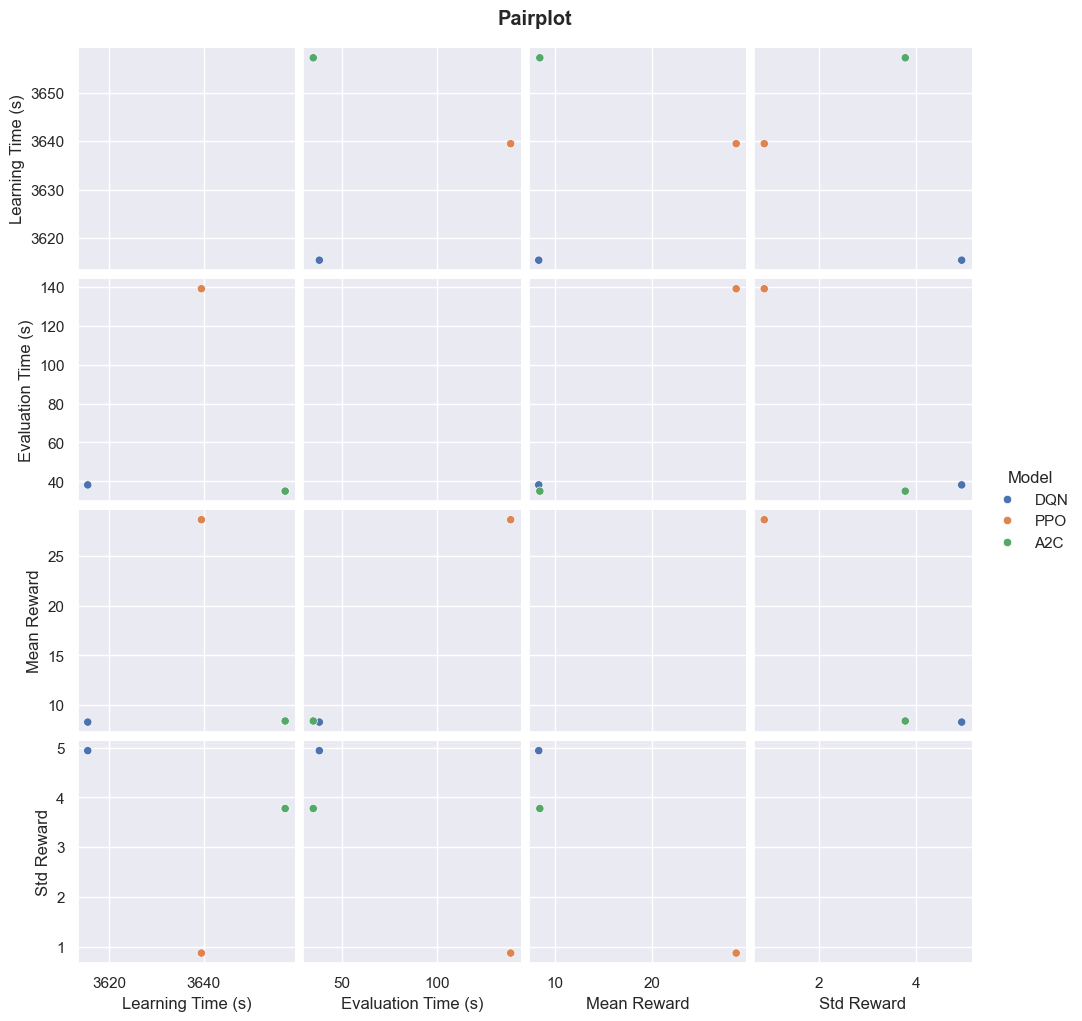

In [54]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=data, hue="Model")
plt.suptitle('Pairplot', fontweight="bold", y=1.02)
plt.show()